In [52]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler
import pandas as pd  
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import math
from numpy import concatenate

df=pd.read_csv('EURUSD_H.csv')
df.columns = ['date','open','high','low','close','volume']
df.date = pd.to_datetime(df.date,format='%d.%m.%Y  %H:%M:%S.%f')


#Preprocessing

df=df[['close']]
dataset=df.values
dataset=dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train=dataset[:38000]
test=dataset[38000:]



def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 20
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#Building the model

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)


#Prediction

pred = model.predict(testX)
predictions = pd.DataFrame()
predictions['predicted'] = pd.Series(np.reshape(pred, (pred.shape[0])))
predictions['actual'] = testY





Epoch 1/100
 - 4s - loss: 0.1084
Epoch 2/100
 - 0s - loss: 0.0016
Epoch 3/100
 - 1s - loss: 2.4665e-04
Epoch 4/100
 - 0s - loss: 1.3454e-04
Epoch 5/100
 - 0s - loss: 1.2032e-04
Epoch 6/100
 - 0s - loss: 1.1547e-04
Epoch 7/100
 - 0s - loss: 1.1244e-04
Epoch 8/100
 - 0s - loss: 1.0977e-04
Epoch 9/100
 - 0s - loss: 1.0686e-04
Epoch 10/100
 - 0s - loss: 1.0363e-04
Epoch 11/100
 - 0s - loss: 1.0006e-04
Epoch 12/100
 - 0s - loss: 9.6071e-05
Epoch 13/100
 - 0s - loss: 9.1742e-05
Epoch 14/100
 - 1s - loss: 8.7074e-05
Epoch 15/100
 - 1s - loss: 8.2246e-05
Epoch 16/100
 - 1s - loss: 7.7352e-05
Epoch 17/100
 - 0s - loss: 7.2432e-05
Epoch 18/100
 - 0s - loss: 6.7618e-05
Epoch 19/100
 - 0s - loss: 6.3133e-05
Epoch 20/100
 - 0s - loss: 5.8744e-05
Epoch 21/100
 - 0s - loss: 5.4884e-05
Epoch 22/100
 - 0s - loss: 5.1042e-05
Epoch 23/100
 - 0s - loss: 4.7553e-05
Epoch 24/100
 - 0s - loss: 4.4243e-05
Epoch 25/100
 - 0s - loss: 4.1274e-05
Epoch 26/100
 - 0s - loss: 3.8512e-05
Epoch 27/100
 - 0s - loss: 3.

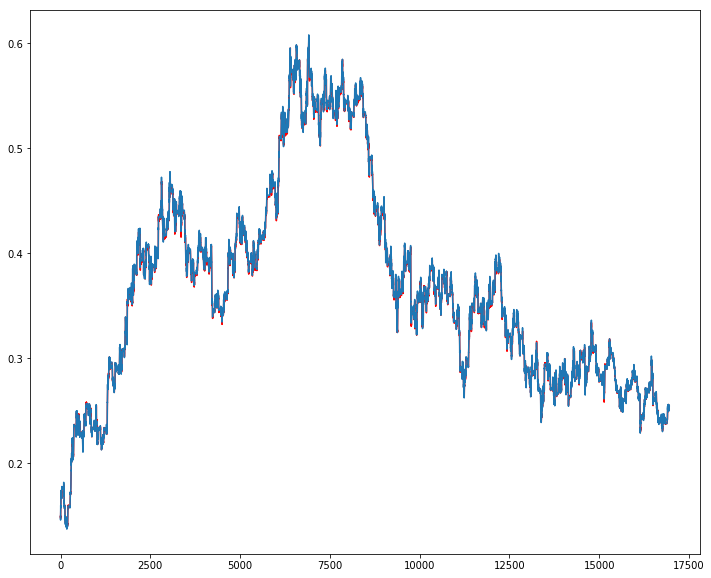

In [53]:

plt.figure(figsize=(12,10))

plt.plot(predictions['predicted'],color='red')
plt.plot(predictions['actual'])
plt.show()



In [54]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

MSE :  8.934757e-06


In [55]:
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

MAE :  0.002049856


In [56]:
from sklearn.metrics import r2_score

print("r2_score : ", r2_score(predictions['predicted'].values, predictions['actual'].values))

r2_score :  0.9990807549447485


In [57]:
print(testY)


[0.14962983 0.14890885 0.14599776 ... 0.25556564 0.2547617  0.25503898]


In [58]:
testY = testY.reshape((len(testY), 1))
inv_y = scaler.inverse_transform(testY)
print(inv_y)

[[1.08959]
 [1.08933]
 [1.08828]
 ...
 [1.1278 ]
 [1.12751]
 [1.12761]]


In [44]:
pred = pred.reshape((len(pred), 1))
inv_pred = scaler.inverse_transform(pred)
print(inv_pred)

[[1.0895978]
 [1.0894829]
 [1.0894474]
 ...
 [1.1269902]
 [1.1275465]
 [1.1277187]]


In [45]:
testY = testY.reshape((len(testY), 1))
inv_y = scaler.inverse_transform(testY)
pred = pred.reshape((len(pred), 1))
inv_pred = scaler.inverse_transform(pred)


for t in range(len(testY)):
     print('Predicted Euro Rate = %.5f, Expected Euro Rate = %.5f' % (inv_pred[t],inv_y[t]))


Predicted Euro Rate = 1.08960, Expected Euro Rate = 1.08959
Predicted Euro Rate = 1.08948, Expected Euro Rate = 1.08933
Predicted Euro Rate = 1.08945, Expected Euro Rate = 1.08828
Predicted Euro Rate = 1.08880, Expected Euro Rate = 1.09117
Predicted Euro Rate = 1.08998, Expected Euro Rate = 1.09184
Predicted Euro Rate = 1.09061, Expected Euro Rate = 1.09328
Predicted Euro Rate = 1.09223, Expected Euro Rate = 1.09306
Predicted Euro Rate = 1.09246, Expected Euro Rate = 1.09244
Predicted Euro Rate = 1.09278, Expected Euro Rate = 1.09345
Predicted Euro Rate = 1.09312, Expected Euro Rate = 1.09369
Predicted Euro Rate = 1.09377, Expected Euro Rate = 1.09450
Predicted Euro Rate = 1.09400, Expected Euro Rate = 1.09665
Predicted Euro Rate = 1.09480, Expected Euro Rate = 1.09735
Predicted Euro Rate = 1.09627, Expected Euro Rate = 1.09676
Predicted Euro Rate = 1.09665, Expected Euro Rate = 1.09775
Predicted Euro Rate = 1.09709, Expected Euro Rate = 1.09846
Predicted Euro Rate = 1.09825, Expected 

Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14251
Predicted Euro Rate = 1.14250, Expected Euro Rate = 1.14214
Predicted Euro Rate = 1.14232, Expected Euro Rate = 1.14250
Predicted Euro Rate = 1.14238, Expected 

Predicted Euro Rate = 1.19192, Expected Euro Rate = 1.19339
Predicted Euro Rate = 1.19224, Expected Euro Rate = 1.19324
Predicted Euro Rate = 1.19285, Expected Euro Rate = 1.19254
Predicted Euro Rate = 1.19315, Expected Euro Rate = 1.19307
Predicted Euro Rate = 1.19316, Expected Euro Rate = 1.19334
Predicted Euro Rate = 1.19359, Expected Euro Rate = 1.19367
Predicted Euro Rate = 1.19377, Expected Euro Rate = 1.19252
Predicted Euro Rate = 1.19337, Expected Euro Rate = 1.19346
Predicted Euro Rate = 1.19322, Expected Euro Rate = 1.19363
Predicted Euro Rate = 1.19352, Expected Euro Rate = 1.19547
Predicted Euro Rate = 1.19440, Expected Euro Rate = 1.19719
Predicted Euro Rate = 1.19590, Expected Euro Rate = 1.19765
Predicted Euro Rate = 1.19708, Expected Euro Rate = 1.19773
Predicted Euro Rate = 1.19817, Expected Euro Rate = 1.19789
Predicted Euro Rate = 1.19846, Expected Euro Rate = 1.19741
Predicted Euro Rate = 1.19866, Expected Euro Rate = 1.19784
Predicted Euro Rate = 1.19866, Expected 

Predicted Euro Rate = 1.16046, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16069, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16095, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16034, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16085, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16062, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16061, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16069, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16069, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16066, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16067, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16067, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16067, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16067, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16067, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16067, Expected Euro Rate = 1.16060
Predicted Euro Rate = 1.16067, Expected 

Predicted Euro Rate = 1.24326, Expected Euro Rate = 1.24416
Predicted Euro Rate = 1.24419, Expected Euro Rate = 1.24327
Predicted Euro Rate = 1.24398, Expected Euro Rate = 1.24216
Predicted Euro Rate = 1.24300, Expected Euro Rate = 1.24390
Predicted Euro Rate = 1.24366, Expected Euro Rate = 1.24445
Predicted Euro Rate = 1.24430, Expected Euro Rate = 1.24207
Predicted Euro Rate = 1.24421, Expected Euro Rate = 1.24198
Predicted Euro Rate = 1.24303, Expected Euro Rate = 1.24283
Predicted Euro Rate = 1.24316, Expected Euro Rate = 1.24283
Predicted Euro Rate = 1.24335, Expected Euro Rate = 1.24283
Predicted Euro Rate = 1.24281, Expected Euro Rate = 1.24283
Predicted Euro Rate = 1.24292, Expected Euro Rate = 1.24283
Predicted Euro Rate = 1.24318, Expected Euro Rate = 1.24283
Predicted Euro Rate = 1.24372, Expected Euro Rate = 1.24283
Predicted Euro Rate = 1.24339, Expected Euro Rate = 1.24283
Predicted Euro Rate = 1.24352, Expected Euro Rate = 1.24283
Predicted Euro Rate = 1.24323, Expected 

Predicted Euro Rate = 1.23038, Expected Euro Rate = 1.23121
Predicted Euro Rate = 1.23103, Expected Euro Rate = 1.23146
Predicted Euro Rate = 1.23122, Expected Euro Rate = 1.23138
Predicted Euro Rate = 1.23185, Expected Euro Rate = 1.23115
Predicted Euro Rate = 1.23187, Expected Euro Rate = 1.23065
Predicted Euro Rate = 1.23151, Expected Euro Rate = 1.23171
Predicted Euro Rate = 1.23205, Expected Euro Rate = 1.23229
Predicted Euro Rate = 1.23278, Expected Euro Rate = 1.23280
Predicted Euro Rate = 1.23277, Expected Euro Rate = 1.23267
Predicted Euro Rate = 1.23291, Expected Euro Rate = 1.23262
Predicted Euro Rate = 1.23328, Expected Euro Rate = 1.23274
Predicted Euro Rate = 1.23353, Expected Euro Rate = 1.23275
Predicted Euro Rate = 1.23372, Expected Euro Rate = 1.23256
Predicted Euro Rate = 1.23347, Expected Euro Rate = 1.23211
Predicted Euro Rate = 1.23286, Expected Euro Rate = 1.23176
Predicted Euro Rate = 1.23263, Expected Euro Rate = 1.23256
Predicted Euro Rate = 1.23290, Expected 

Predicted Euro Rate = 1.16926, Expected Euro Rate = 1.16485
Predicted Euro Rate = 1.16710, Expected Euro Rate = 1.16701
Predicted Euro Rate = 1.16596, Expected Euro Rate = 1.16685
Predicted Euro Rate = 1.16649, Expected Euro Rate = 1.16706
Predicted Euro Rate = 1.16676, Expected Euro Rate = 1.16781
Predicted Euro Rate = 1.16731, Expected Euro Rate = 1.16862
Predicted Euro Rate = 1.16792, Expected Euro Rate = 1.16903
Predicted Euro Rate = 1.16895, Expected Euro Rate = 1.16918
Predicted Euro Rate = 1.16974, Expected Euro Rate = 1.16917
Predicted Euro Rate = 1.16972, Expected Euro Rate = 1.17049
Predicted Euro Rate = 1.16963, Expected Euro Rate = 1.16922
Predicted Euro Rate = 1.17035, Expected Euro Rate = 1.16938
Predicted Euro Rate = 1.16924, Expected Euro Rate = 1.16922
Predicted Euro Rate = 1.16933, Expected Euro Rate = 1.16848
Predicted Euro Rate = 1.16953, Expected Euro Rate = 1.16820
Predicted Euro Rate = 1.16865, Expected Euro Rate = 1.16780
Predicted Euro Rate = 1.16775, Expected 

Predicted Euro Rate = 1.16620, Expected Euro Rate = 1.16618
Predicted Euro Rate = 1.16620, Expected Euro Rate = 1.16649
Predicted Euro Rate = 1.16640, Expected Euro Rate = 1.16546
Predicted Euro Rate = 1.16605, Expected Euro Rate = 1.16508
Predicted Euro Rate = 1.16552, Expected Euro Rate = 1.16472
Predicted Euro Rate = 1.16511, Expected Euro Rate = 1.16503
Predicted Euro Rate = 1.16492, Expected Euro Rate = 1.16304
Predicted Euro Rate = 1.16407, Expected Euro Rate = 1.16311
Predicted Euro Rate = 1.16337, Expected Euro Rate = 1.16201
Predicted Euro Rate = 1.16249, Expected Euro Rate = 1.16141
Predicted Euro Rate = 1.16191, Expected Euro Rate = 1.16224
Predicted Euro Rate = 1.16179, Expected Euro Rate = 1.16172
Predicted Euro Rate = 1.16161, Expected Euro Rate = 1.16263
Predicted Euro Rate = 1.16188, Expected Euro Rate = 1.16251
Predicted Euro Rate = 1.16223, Expected Euro Rate = 1.16116
Predicted Euro Rate = 1.16187, Expected Euro Rate = 1.16121
Predicted Euro Rate = 1.16148, Expected 

Predicted Euro Rate = 1.15583, Expected Euro Rate = 1.15636
Predicted Euro Rate = 1.15641, Expected Euro Rate = 1.15652
Predicted Euro Rate = 1.15611, Expected Euro Rate = 1.15670
Predicted Euro Rate = 1.15670, Expected Euro Rate = 1.15472
Predicted Euro Rate = 1.15600, Expected Euro Rate = 1.15315
Predicted Euro Rate = 1.15441, Expected Euro Rate = 1.15351
Predicted Euro Rate = 1.15374, Expected Euro Rate = 1.15376
Predicted Euro Rate = 1.15353, Expected Euro Rate = 1.15295
Predicted Euro Rate = 1.15278, Expected Euro Rate = 1.15400
Predicted Euro Rate = 1.15303, Expected Euro Rate = 1.15274
Predicted Euro Rate = 1.15266, Expected Euro Rate = 1.15157
Predicted Euro Rate = 1.15227, Expected Euro Rate = 1.15062
Predicted Euro Rate = 1.15164, Expected Euro Rate = 1.15061
Predicted Euro Rate = 1.15085, Expected Euro Rate = 1.14999
Predicted Euro Rate = 1.14998, Expected Euro Rate = 1.14996
Predicted Euro Rate = 1.14975, Expected Euro Rate = 1.14981
Predicted Euro Rate = 1.14925, Expected 

Predicted Euro Rate = 1.13980, Expected Euro Rate = 1.13988
Predicted Euro Rate = 1.13982, Expected Euro Rate = 1.13988
Predicted Euro Rate = 1.13983, Expected Euro Rate = 1.13988
Predicted Euro Rate = 1.13984, Expected Euro Rate = 1.14064
Predicted Euro Rate = 1.14019, Expected Euro Rate = 1.14131
Predicted Euro Rate = 1.14080, Expected Euro Rate = 1.14057
Predicted Euro Rate = 1.14095, Expected Euro Rate = 1.14099
Predicted Euro Rate = 1.14087, Expected Euro Rate = 1.14114
Predicted Euro Rate = 1.14112, Expected Euro Rate = 1.14143
Predicted Euro Rate = 1.14149, Expected Euro Rate = 1.14054
Predicted Euro Rate = 1.14102, Expected Euro Rate = 1.14024
Predicted Euro Rate = 1.14063, Expected Euro Rate = 1.14051
Predicted Euro Rate = 1.14043, Expected Euro Rate = 1.14023
Predicted Euro Rate = 1.14046, Expected Euro Rate = 1.13919
Predicted Euro Rate = 1.13983, Expected Euro Rate = 1.13842
Predicted Euro Rate = 1.13891, Expected Euro Rate = 1.13849
Predicted Euro Rate = 1.13861, Expected 

Predicted Euro Rate = 1.13377, Expected Euro Rate = 1.13480
Predicted Euro Rate = 1.13441, Expected Euro Rate = 1.13460
Predicted Euro Rate = 1.13464, Expected Euro Rate = 1.13437
Predicted Euro Rate = 1.13477, Expected Euro Rate = 1.13493
Predicted Euro Rate = 1.13481, Expected Euro Rate = 1.13471
Predicted Euro Rate = 1.13495, Expected Euro Rate = 1.13545
Predicted Euro Rate = 1.13535, Expected Euro Rate = 1.13525
Predicted Euro Rate = 1.13532, Expected Euro Rate = 1.13551
Predicted Euro Rate = 1.13551, Expected Euro Rate = 1.13552
Predicted Euro Rate = 1.13545, Expected Euro Rate = 1.13522
Predicted Euro Rate = 1.13566, Expected Euro Rate = 1.13460
Predicted Euro Rate = 1.13523, Expected Euro Rate = 1.13501
Predicted Euro Rate = 1.13515, Expected Euro Rate = 1.13464
Predicted Euro Rate = 1.13493, Expected Euro Rate = 1.13494
Predicted Euro Rate = 1.13493, Expected Euro Rate = 1.13538
Predicted Euro Rate = 1.13507, Expected Euro Rate = 1.13531
Predicted Euro Rate = 1.13537, Expected 

In [35]:
print(testX.shape)

(16952, 1, 20)


In [54]:
print(testY.shape)

(16952, 1)


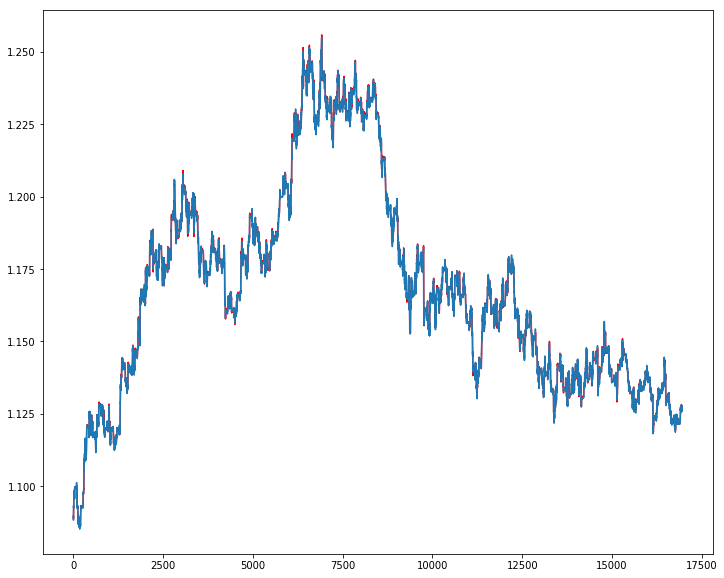

In [46]:

predictions = pd.DataFrame()
predictions['predicted'] = pd.Series(np.reshape(inv_pred, (inv_pred.shape[0])))
predictions['actual'] = inv_y


plt.figure(figsize=(12,10))
plt.plot(predictions['predicted'],color='red')
plt.plot(predictions['actual'])
plt.show()